In [2]:
import pandas as pd

df = pd.read_csv("data/data_minus_one.csv")
df

,Title
0,예전에 가스 오븐만 사용해 봤는데 이오니 가스레인지 밑에 전기 광파 오븐이 설치해 ...
1,안녕하세요 우리 가전 광파 오븐
2,월에 캐나다로 예정입니다 집에 디오스 광파 오븐 있는데 이게 전자레인지나 오븐 에어...
3,집에 에어 프라이어 오븐과 디오스 광파 오븐 전자레인지 회전함 아파트 옵션이 있는데...
4,통합된 광파 오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 ...
...,...
9902,광파 오븐 이건 조합원만 주나요 지인이 일반 분양 거로 계약했다는데 물어보네요
9903,안녕하십니까 새로운 정보를 가지고 오는 전자 구미형 곡점 김경민 팀장입니다 오늘은 ...
9904,매립된 광파 오븐 사용하고 계시나요 전자레인지 돌리면 원래 안에 없이 돌아가나요 보...
9905,고민 고민하다 세탁실 선반에 광파 오븐 뒀는데 제가 키가 작아서 불편하기도 하고 혹...


In [4]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# ko-sentence-transformer 모델 로드
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

# Title 컬럼을 임베딩, tqdm을 사용하여 진행 상황 표시
embeddings = [model.encode(sentence) for sentence in tqdm(df['Title'].tolist())]
df['Embedding'] = embeddings

C:\Users\dxschool\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 9907/9907 [12:55<00:00, 12.77it/s]


In [21]:
df['Embedding'] = embeddings
df

,Title,cluster,Sentiment,Embedding
0,예전에 가스 오븐만 사용해 봤는데 이오니 가스레인지 밑에 전기 광파 오븐이 설치해 ...,1,2 stars,"[-0.1266276, -0.2592575, -1.0420744, -0.031171..."
1,안녕하세요 우리 가전 광파 오븐,1,5 stars,"[0.39554408, -0.41648337, -0.898048, -0.614055..."
2,월에 캐나다로 예정입니다 집에 디오스 광파 오븐 있는데 이게 전자레인지나 오븐 에어...,1,3 stars,"[-0.048966702, 0.1367302, -0.9512712, -0.85855..."
3,집에 에어 프라이어 오븐과 디오스 광파 오븐 전자레인지 회전함 아파트 옵션이 있는데...,1,4 stars,"[-0.2039533, -0.7562688, -1.4146961, -0.573357..."
4,통합된 광파 오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 ...,1,3 stars,"[0.28232378, -0.26165417, -0.7724575, -0.22539..."
...,...,...,...,...
9902,광파 오븐 이건 조합원만 주나요 지인이 일반 분양 거로 계약했다는데 물어보네요,1,1 star,"[-0.77799433, -0.31426603, -0.6538581, 0.50148..."
9903,안녕하십니까 새로운 정보를 가지고 오는 전자 구미형 곡점 김경민 팀장입니다 오늘은 ...,1,3 stars,"[-0.89212155, -0.21455413, -0.93405074, -0.788..."
9904,매립된 광파 오븐 사용하고 계시나요 전자레인지 돌리면 원래 안에 없이 돌아가나요 보...,1,1 star,"[0.44254845, -0.65202653, -0.58684754, -0.8152..."
9905,고민 고민하다 세탁실 선반에 광파 오븐 뒀는데 제가 키가 작아서 불편하기도 하고 혹...,1,1 star,"[0.63421166, -0.78125983, -0.7601801, 0.004233..."


In [36]:
from konlpy.tag import Okt
#원하는 태그 추출 & 불용어 제거
okt = Okt()
def okt_pos_tagging(string):  # 사용자 정의 함수, 매개변수 = String
    pos_words = okt.pos(string, stem=True, norm=True)  # pos 함수 : 형태소를 쪼개면서 동시에 품사를 알려준다.

    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in ["가", "가까스로", "가령", "각", "각각", "각자", "각종", "갖고말하자면", "같다", "같이", "개의치않고", "거니와", "거바", "거의", "것", "것과 같이", "것들", "게다가", "게우다", "겨우", "견지에서", "결과에 이르다", "결국", "결론을 낼 수 있다", "겸사겸사", "고려하면", "고로", "곧", "공동으로", "과", "과연", "관계가 있다", "관계없이", "관련이 있다", "관하여", "관한", "관해서는", "구", "구체적으로", "구토하다", "그", "그들", "그때", "그래", "그래도", "그래서", "그러나", "그러니", "그러니까", "그러면", "그러므로", "그러한즉", "그런 까닭에", "그런데", "그런즉", "그럼", "그럼에도 불구하고", "그렇게 함으로써", "그렇지", "그렇지 않다면", "그렇지 않으면", "그렇지만", "그렇지않으면", "그리고", "그리하여", "그만이다", "그에 따르는", "그위에", "그저", "그중에서", "그치지 않다", "근거로", "근거하여", "기대여", "기점으로", "기준으로", "기타", "까닭으로", "까악", "까지", "까지 미치다", "까지도", "꽈당", "끙끙", "끼익", "나", "나머지는", "남들", "남짓", "너", "너희", "너희들", "네", "넷", "년", "논하지 않다", "놀라다", "누가 알겠는가", "누구", "다른", "다른 방면으로", "다만", "다섯", "다소", "다수", "다시 말하자면", "다시말하면", "다음", "다음에", "다음으로", "단지", "답다", "당신", "당장", "대로 하다", "대하면", "대하여", "대해 말하자면", "대해서", "댕그", "더구나", "더군다나", "더라도", "더불어", "더욱더", "더욱이는", "도달하다", "도착하다", "동시에", "동안", "된바에야", "된이상", "두번째로", "둘", "둥둥", "뒤따라", "뒤이어", "든간에", "들", "등", "등등", "딩동", "따라", "따라서", "따위", "따지지 않다", "딱", "때", "때가 되어", "때문에", "또", "또한", "뚝뚝", "라 해도", "령", "로", "로 인하여", "로부터", "로써", "륙", "를", "마음대로", "마저", "마저도", "마치", "막론하고", "만 못하다", "만약", "만약에", "만은 아니다", "만이 아니다", "만일", "만큼", "말하자면", "말할것도 없고", "매", "매번", "메쓰겁다", "몇", "모", "모두", "무렵", "무릎쓰고", "무슨", "무엇", "무엇때문에", "물론", "및", "바꾸어말하면", "바꾸어말하자면", "바꾸어서 말하면", "바꾸어서 한다면", "바꿔 말하면", "바로", "바와같이", "밖에 안된다", "반대로", "반대로 말하자면", "반드시", "버금", "보는데서", "보다더", "보드득", "본대로", "봐", "봐라", "부류의 사람들", "부터", "불구하고", "불문하고", "붕붕", "비걱거리다", "비교적", "비길수 없다", "비로소", "비록", "비슷하다", "비추어 보아", "비하면", "뿐만 아니라", "뿐만아니라", "뿐이다", "삐걱", "삐걱거리다", "사", "삼", "상대적으로 말하자면", "생각한대로", "설령", "설마", "설사", "셋", "소생", "소인", "솨", "쉿", "습니까", "습니다", "시각", "시간", "시작하여", "시초에", "시키다", "실로", "심지어", "아", "아니", "아니나다를가", "아니라면", "아니면", "아니었다면", "아래윗", "아무거나", "아무도", "아야", "아울러", "아이", "아이고", "아이구", "아이야", "아이쿠", "아하", "아홉", "안 그러면", "않기 위하여", "않기 위해서", "알 수 있다", "알았어", "앗", "앞에서", "앞의것", "야", "약간", "양자", "어", "어기여차", "어느", "어느 년도", "어느것", "어느곳", "어느때", "어느쪽", "어느해", "어디", "어때", "어떠한", "어떤", "어떤것", "어떤것들", "어떻게", "어떻해", "어이", "어째서", "어쨋든", "어쩔수 없다", "어찌", "어찌됏든", "어찌됏어", "어찌하든지", "어찌하여", "언제", "언젠가", "얼마", "얼마 안 되는 것", "얼마간", "얼마나", "얼마든지", "얼마만큼", "얼마큼", "엉엉", "에", "에 가서", "에 달려 있다", "에 대해", "에 있다", "에 한하다", "에게", "에서", "여", "여기", "여덟", "여러분", "여보시오", "여부", "여섯", "여전히", "여차", "연관되다", "연이서", "영", "영차", "옆사람", "예", "예를 들면", "예를 들자면", "예컨대", "예하면", "오", "오로지", "오르다", "오자마자", "오직", "오호", "오히려", "와", "와 같은 사람들", "와르르", "와아", "왜", "왜냐하면", "외에도", "요만큼", "요만한 것", "요만한걸", "요컨대", "우르르", "우리", "우리들", "우선", "우에 종합한것과같이", "운운", "월", "위에서 서술한바와같이", "위하여", "위해서", "윙윙", "육", "으로", "으로 인하여", "으로서", "으로써", "을", "응", "응당", "의", "의거하여", "의지하여", "의해", "의해되다", "의해서", "이", "이 되다", "이 때문에", "이 밖에", "이 외에", "이 정도의", "이것", "이곳", "이때", "이라면", "이래", "이러이러하다", "이러한", "이런", "이럴정도로", "이렇게 많은 것", "이렇게되면", "이렇게말하자면", "이렇구나", "이로 인하여", "이르기까지", "이리하여", "이만큼", "이번", "이봐", "이상", "이어서", "이었다", "이와 같다", "이와 같은", "이와 반대로", "이와같다면", "이외에도", "이용하여", "이유만으로", "이젠", "이지만", "이쪽", "이천구", "이천육", "이천칠", "이천팔", "인 듯하다", "인젠", "일", "일것이다", "일곱", "일단", "일때", "일반적으로", "일지라도", "임에 틀림없다", "입각하여", "입장에서", "잇따라", "있다", "자", "자기", "자기집", "자마자", "자신", "잠깐", "잠시", "저", "저것", "저것만큼", "저기", "저쪽", "저희", "전부", "전자", "전후", "점에서 보아", "정도에 이르다", "제", "제각기", "제외하고", "조금", "조차", "조차도", "졸졸", "좀", "좋아", "좍좍", "주룩주룩", "주저하지 않고", "줄은 몰랏다", "줄은모른다", "중에서", "중의하나", "즈음하여", "즉", "즉시", "지든지", "지만", "지말고", "진짜로", "쪽으로", "차라리", "참", "참나", "첫번째로", "쳇", "총적으로", "총적으로 말하면", "총적으로 보면", "칠", "콸콸", "쾅쾅", "쿵", "타다", "타인", "탕탕", "토하다", "통하여", "툭", "퉤", "틈타", "팍", "팔", "퍽", "펄렁", "하", "하게될것이다", "하게하다", "하겠는가", "하고 있다", "하고있었다", "하곤하였다", "하구나", "하기 때문에", "하기 위하여", "하기는한데", "하기만 하면", "하기보다는", "하기에", "하나", "하느니", "하는 김에", "하는 편이 낫다", "하는것도", "하는것만 못하다", "하는것이 낫다", "하는바", "하더라도", "하도다", "하도록시키다", "하도록하다", "하든지", "하려고하다", "하마터면", "하면 할수록", "하면된다", "하면서", "하물며", "하여금", "하여야", "하자마자", "하지 않는다면", "하지 않도록", "하지마", "하지마라", "하지만", "하하", "한 까닭에", "한 이유는", "한 후", "한다면", "한다면 몰라도", "한데", "한마디", "한적이있다", "한켠으로는", "한항목", "할 따름이다", "할 생각이다", "할 줄 안다", "할 지경이다", "할 힘이 있다", "할때", "할만하다", "할망정", "할뿐", "할수있다", "할수있어", "할줄알다", "할지라도", "할지언정", "함께", "해도된다", "해도좋다", "해봐요", "해서는 안된다", "해야한다", "해요", "했어요", "향하다", "향하여", "향해서", "허", "허걱", "허허", "헉", "헉헉", "헐떡헐떡", "형식으로 쓰여", "혹시", "혹은", "혼자", "훨씬", "휘익", "휴", "흐흐", "흥", "힘입어", "하다", "이다", "되다", "어떻다", "가스레인지", "가전", "가전제품", "가장", "가지", "건조기", "김치냉장고", "나다", "냉동고", "냉장고", "다리미", "다가", "디오스", "롯데", "로봇청소기", "로켓", "매직", "먹다", "미사", "미스터", "미스트", "발뮤", "베이", "베이지", "베스트", "보다", "본점", "보온밥솥", "보시", "브레빌", "블랙", "비도", "상품", "상세", "삼성", "센티", "세탁기", "스탠바이", "스팀청소기", "스타", "쓰다", "식기건조기", "식기세척기", "싶다", "아마", "에어", "에어컨", "에프", "엘지", "은지", "이기", "인덕션", "인버터", "자꾸", "정말", "정수기", "정보", "제품", "제품원래", "전자레", "전자레인지", "전자렌지", "전기그릴", "전기레인지", "전기난로", "전기밥솥", "정도", "좋다", "좋다디자인", "좋다다양하다", "좋다좋다", "좋다이벤트", "진짜", "커피머신", "쿠잉", "쿠쿠", "타워", "한경희", "현대", "화이트", "히엠즈", "후기", "광파오븐", "오븐", "광파", "에어", "오브", "프라이어", "컬렉션", "전자", "전자레인지", 
                        "레인지", "전자렌지", "엘지", "삼성", "디오스", "프라이", "되어다", "카밍", "에센스", 
                        "프라", "아주", "제품원래", "나다", "이기", "에프", "베이지", "화이트", "냉장고", 
                        "식기세척기", "에어컨", "인덕션", "한번", "정도", "유무", "청소기", "진짜", "가장", 
                        "김치냉장고", "좋다디자인", "공기청정기", "제품원래", "인버터", "롯데", "밥솥", "싶다", 
                        "본점", "받다", "안녕하다", "보다", "써다", "유무", "먹다", "상세", "쓰다", "만들다", 
                        "현대", "좋다다양하다", "좋다좋다", "전기레인지", "하이마트", "좋다이벤트", "후기", 
                        "구매", "제품", "가전", "상품", "보다", "냉장고", "받다", "방문", "배송", "정보", 
                        "베스트", "베이지", "정수기", "식기세척기", "청소기", "확인", "스타", "인덕션", 
                        "해보다", "에어컨", "로켓", "타워", "싶다", "세탁기", "오늘", "핫딜", "화이트", 
                        "김치냉장고", "정말", "만원", "써다", "한번", "가지", "처음", "로봇청소기", "티비", 
                        "밥솥", "에프", "전기포트", "믹서기", "식기건조기", "오븐", "전기그릴", "커피머신", 
                        "온풍기", "청소기", "가스레인지", "전기밥솥", "제습기", "선풍기", "히터", "스팀청소기", 
                        "전기난로", "냉동고", "가전제품", "다리미", "보온밥솥", "스탠바이", "건조기", "매직", 
                        "원래", "육식", "육식맨", "미스트", "아마", "기세", "블랙", "은지", "자꾸", "해주시", 
                        "비도", "전이", "해먹", "대다", "렌지", "다가",  "중이","계시" 
    "센티", 
    "쿠잉", 
    "브레빌", 
    "발뮤", 
    "스포크", 
    "퍼치스", 
    "히엠즈", 
    "쿠쿠", 
    "미스터", 
    "송사", 
    "미사", 
    "어기", 
    "보시", 
    "전자레"]:
                if len(word) > 1:
                        tagged_list.append(word)
    if len(tagged_list) == 0:
        tagged_list.append("None")
    return tagged_list

In [37]:
#형태소 분리 및 df 적용
tagged_review = []
for review in tqdm(df.Title):
    tagged = okt_pos_tagging(review)
    tagged_review.append(tagged)
df['tagged_review'] = tagged_review
df = df[~df['tagged_review'].apply(lambda x: "None" in x)]
df

100%|██████████| 9907/9907 [01:12<00:00, 136.57it/s]


,Title,cluster,Sentiment,Embedding,tagged_review
0,예전에 가스 오븐만 사용해 봤는데 이오니 가스레인지 밑에 전기 광파 오븐이 설치해 ...,1,2 stars,"[-0.1266276, -0.2592575, -1.0420744, -0.031171...","[예전, 가스, 사용, 전기, 설치, 케이크, 구울, 간단하다]"
2,월에 캐나다로 예정입니다 집에 디오스 광파 오븐 있는데 이게 전자레인지나 오븐 에어...,1,3 stars,"[-0.048966702, 0.1367302, -0.9512712, -0.85855...","[캐나다, 예정, 기능, 많다, 캐나다, 전압, 달라, 가져가다]"
3,집에 에어 프라이어 오븐과 디오스 광파 오븐 전자레인지 회전함 아파트 옵션이 있는데...,1,4 stars,"[-0.2039533, -0.7562688, -1.4146961, -0.573357...","[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다]"
4,통합된 광파 오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 ...,1,3 stars,"[0.28232378, -0.26165417, -0.7724575, -0.22539...","[통합, 크다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨, 튀기..."
5,생선 굽거나 닭봉구이 정도 하려면 뭐가 나을까요 엘지 광파 오븐 쿠진아트 에어 프라...,1,3 stars,"[-0.6026252, -0.8564646, -1.0997227, -0.311962...","[생선, 굽다, 봉구, 쿠진, 아트, 요즘, 많다, 실제, 쓸다, 조언, 부탁드리다]"
...,...,...,...,...,...
9902,광파 오븐 이건 조합원만 주나요 지인이 일반 분양 거로 계약했다는데 물어보네요,1,1 star,"[-0.77799433, -0.31426603, -0.6538581, 0.50148...","[조합원, 주다, 지인, 일반, 분양, 계약, 물어보다]"
9903,안녕하십니까 새로운 정보를 가지고 오는 전자 구미형 곡점 김경민 팀장입니다 오늘은 ...,1,3 stars,"[-0.89212155, -0.21455413, -0.93405074, -0.788...","[안녕하십니까, 새롭다, 오다, 구미, 곡점, 김경민, 많다, 관심, 생각, 비싸다..."
9904,매립된 광파 오븐 사용하고 계시나요 전자레인지 돌리면 원래 안에 없이 돌아가나요 보...,1,1 star,"[0.44254845, -0.65202653, -0.58684754, -0.8152...","[매립, 사용, 계시다, 돌리다, 돌아가다, 보통, 빨갛다, 켜다, 돌다, 가다, ..."
9905,고민 고민하다 세탁실 선반에 광파 오븐 뒀는데 제가 키가 작아서 불편하기도 하고 혹...,1,1 star,"[0.63421166, -0.78125983, -0.7601801, 0.004233...","[고민, 고민, 세탁실, 선반, 두다, 작다, 불편하다, 부서지다, 걱정, 돼다, ..."


In [38]:
df_cluster0 = df[df["cluster"] == 0]
display(df_cluster0)
display(df_cluster0.shape)

,Title,cluster,Sentiment,Embedding,tagged_review
14,안녕하세요 한경희광파오븐 찾는 분들이 관심을 갖고 글을 클릭하게 되셨을 텐데요 제가...,0,5 stars,"[-0.7786541, -0.5568603, -0.5623417, 0.0579120...","[찾다, 관심, 갖다, 클릭, 대해, 찾아보다, 정리, 알다, 드리다, 먼저]"
57,광파 오븐은 선물을 받아서 너무 유용하게 사용 중입니다 전자레인지 오븐 에어 프라이...,0,2 stars,"[-0.36110333, -0.18067771, -1.1377997, -0.5883...","[선물, 유용하다, 사용, 기능, 만족스럽다, 크기, 커서, 여러, 요리, 제약]"
201,안녕하세요 신혼집을 맞춘 터라 광파 오븐도 진행합니다 친구의 추천으로 광파 오븐이 ...,0,5 stars,"[-0.84238154, -0.8974629, -0.89271253, -1.1163...","[신혼집, 맞추다, 진행, 친구, 추천, 만족, 사용]"
333,화제 집중 쿠쿠 멀티 광파 오븐 직접 설치 할인하네요 반갑습니다 여러분의 제품 리뷰...,0,5 stars,"[-1.2620679, -0.94835097, -1.6573796, -0.64798...","[화제, 집중, 멀티, 직접, 설치, 할인, 반갑다, 리뷰, 기분, 알아보다]"
424,미디어 광파 오븐 에어 프라이어 상품에 대한 성능과 장점 다양한 정보를 공유해 드리...,0,5 stars,"[-1.1050419, -0.57677907, -1.0518634, -0.47205...","[미디어, 대한, 성능, 장점, 다양하다, 공유, 드리다, 해당, 고민, 많다, 정..."
...,...,...,...,...,...
9876,대신에 옷감이 쉽게 상한다고 상대 회사에서 그러고 어떤 좋은지 봐서 모르겠네요,0,3 stars,"[-0.111968845, -0.14966369, -0.1664347, 0.1529...","[대신, 옷감, 쉬다, 상대, 회사, 그렇다, 모르다]"
9887,원하시는 양식에 필히 기재해 주세요,0,5 stars,"[-0.555157, 0.61204386, -0.36306262, -0.013481...","[원하다, 양식, 필히, 재해, 줄다]"
9888,제목에 이벤트 기간 사이트 이름 이벤트 이름 표시해 주세요 경품으로 살림 장만하는 ...,0,3 stars,"[-1.1359205, -0.48503226, -0.51206046, -0.4568...","[제목, 이벤트, 기간, 사이트, 이름, 이벤트, 이름, 표시, 줄다, 경품, 살림..."
9893,직거래 사고 불이익에 대해서 책임을 지지 않습니다,0,1 star,"[0.2655645, 0.9612892, -0.22446251, 0.6621173,...","[직거래, 사고, 불이익, 대해, 책임, 지지, 않다]"


(2754, 5)

In [39]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

all_docs = list(df_cluster0["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

3036

In [40]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

2754

Text(0, 0.5, 'Perplexity score')

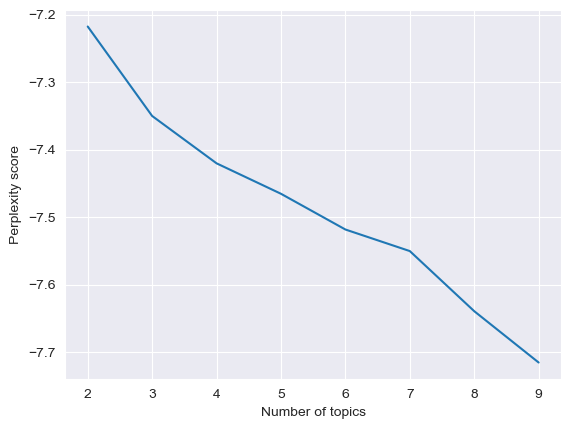

In [41]:
from matplotlib import pyplot as plt
from gensim.models import CoherenceModel
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

100%|██████████| 8/8 [01:14<00:00,  9.29s/it]


Text(0, 0.5, 'Coherence score')

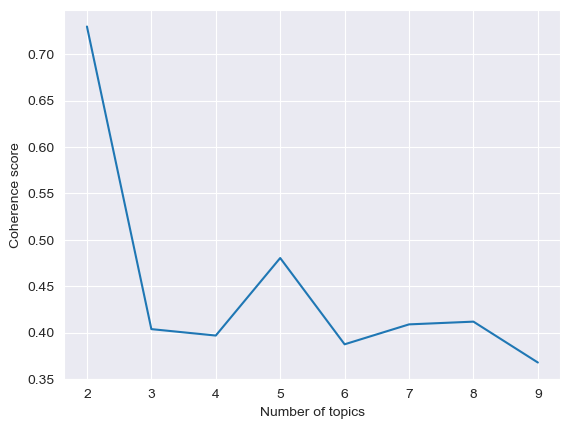

In [42]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [43]:
import numpy as np
from tqdm import tqdm

topic_num = 3
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster0.loc[:, 'action_cluster'] = action_align

df_cluster0

100%|██████████| 2754/2754 [00:00<00:00, 10276.82it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_3636\2168500527.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.loc[:, 'action_cluster'] = action_align


,Title,cluster,Sentiment,Embedding,tagged_review,action_cluster
14,안녕하세요 한경희광파오븐 찾는 분들이 관심을 갖고 글을 클릭하게 되셨을 텐데요 제가...,0,5 stars,"[-0.7786541, -0.5568603, -0.5623417, 0.0579120...","[찾다, 관심, 갖다, 클릭, 대해, 찾아보다, 정리, 알다, 드리다, 먼저]",1
57,광파 오븐은 선물을 받아서 너무 유용하게 사용 중입니다 전자레인지 오븐 에어 프라이...,0,2 stars,"[-0.36110333, -0.18067771, -1.1377997, -0.5883...","[선물, 유용하다, 사용, 기능, 만족스럽다, 크기, 커서, 여러, 요리, 제약]",2
201,안녕하세요 신혼집을 맞춘 터라 광파 오븐도 진행합니다 친구의 추천으로 광파 오븐이 ...,0,5 stars,"[-0.84238154, -0.8974629, -0.89271253, -1.1163...","[신혼집, 맞추다, 진행, 친구, 추천, 만족, 사용]",2
333,화제 집중 쿠쿠 멀티 광파 오븐 직접 설치 할인하네요 반갑습니다 여러분의 제품 리뷰...,0,5 stars,"[-1.2620679, -0.94835097, -1.6573796, -0.64798...","[화제, 집중, 멀티, 직접, 설치, 할인, 반갑다, 리뷰, 기분, 알아보다]",1
424,미디어 광파 오븐 에어 프라이어 상품에 대한 성능과 장점 다양한 정보를 공유해 드리...,0,5 stars,"[-1.1050419, -0.57677907, -1.0518634, -0.47205...","[미디어, 대한, 성능, 장점, 다양하다, 공유, 드리다, 해당, 고민, 많다, 정...",0
...,...,...,...,...,...,...
9876,대신에 옷감이 쉽게 상한다고 상대 회사에서 그러고 어떤 좋은지 봐서 모르겠네요,0,3 stars,"[-0.111968845, -0.14966369, -0.1664347, 0.1529...","[대신, 옷감, 쉬다, 상대, 회사, 그렇다, 모르다]",2
9887,원하시는 양식에 필히 기재해 주세요,0,5 stars,"[-0.555157, 0.61204386, -0.36306262, -0.013481...","[원하다, 양식, 필히, 재해, 줄다]",1
9888,제목에 이벤트 기간 사이트 이름 이벤트 이름 표시해 주세요 경품으로 살림 장만하는 ...,0,3 stars,"[-1.1359205, -0.48503226, -0.51206046, -0.4568...","[제목, 이벤트, 기간, 사이트, 이름, 이벤트, 이름, 표시, 줄다, 경품, 살림...",0
9893,직거래 사고 불이익에 대해서 책임을 지지 않습니다,0,1 star,"[0.2655645, 0.9612892, -0.22446251, 0.6621173,...","[직거래, 사고, 불이익, 대해, 책임, 지지, 않다]",1


In [46]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/html/prepared_data_new_cluster0.html')

In [45]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.020*"디자인" + 0.018*"보고" + 0.016*"기능" + 0.015*"이쁘다" + 0.014*"리뷰" + 0.013*"이벤트" + 0.013*"들다" + 0.012*"깔끔하다" + 0.009*"역시" + 0.008*"다양하다"
Topic ID: 1, Description: 0.022*"요리" + 0.019*"맛있다" + 0.016*"광고" + 0.011*"주다" + 0.008*"주부" + 0.008*"음식" + 0.008*"기능" + 0.008*"영상" + 0.006*"리뷰" + 0.006*"보이다"
Topic ID: 2, Description: 0.037*"사용" + 0.029*"기능" + 0.017*"요리" + 0.016*"많다" + 0.013*"예쁘다" + 0.013*"디자인" + 0.012*"블로그" + 0.011*"만족하다" + 0.009*"다양하다" + 0.007*"줄다"


In [47]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster0.action_cluster):
    if i == 0:
        n = 1
    elif i == 1:
        n = 3
    elif i == 2:
        n = 2
    new_action_topic.append(n)
df_cluster0.action_cluster = new_action_topic

100%|██████████| 2754/2754 [00:00<00:00, 2754199.62it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_3636\2096246837.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.action_cluster = new_action_topic


In [48]:
df_cluster1 = df[df["cluster"] == 1]
display(df_cluster1)
display(df_cluster1.shape)

,Title,cluster,Sentiment,Embedding,tagged_review
0,예전에 가스 오븐만 사용해 봤는데 이오니 가스레인지 밑에 전기 광파 오븐이 설치해 ...,1,2 stars,"[-0.1266276, -0.2592575, -1.0420744, -0.031171...","[예전, 가스, 사용, 전기, 설치, 케이크, 구울, 간단하다]"
2,월에 캐나다로 예정입니다 집에 디오스 광파 오븐 있는데 이게 전자레인지나 오븐 에어...,1,3 stars,"[-0.048966702, 0.1367302, -0.9512712, -0.85855...","[캐나다, 예정, 기능, 많다, 캐나다, 전압, 달라, 가져가다]"
3,집에 에어 프라이어 오븐과 디오스 광파 오븐 전자레인지 회전함 아파트 옵션이 있는데...,1,4 stars,"[-0.2039533, -0.7562688, -1.4146961, -0.573357...","[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다]"
4,통합된 광파 오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 ...,1,3 stars,"[0.28232378, -0.26165417, -0.7724575, -0.22539...","[통합, 크다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨, 튀기..."
5,생선 굽거나 닭봉구이 정도 하려면 뭐가 나을까요 엘지 광파 오븐 쿠진아트 에어 프라...,1,3 stars,"[-0.6026252, -0.8564646, -1.0997227, -0.311962...","[생선, 굽다, 봉구, 쿠진, 아트, 요즘, 많다, 실제, 쓸다, 조언, 부탁드리다]"
...,...,...,...,...,...
9902,광파 오븐 이건 조합원만 주나요 지인이 일반 분양 거로 계약했다는데 물어보네요,1,1 star,"[-0.77799433, -0.31426603, -0.6538581, 0.50148...","[조합원, 주다, 지인, 일반, 분양, 계약, 물어보다]"
9903,안녕하십니까 새로운 정보를 가지고 오는 전자 구미형 곡점 김경민 팀장입니다 오늘은 ...,1,3 stars,"[-0.89212155, -0.21455413, -0.93405074, -0.788...","[안녕하십니까, 새롭다, 오다, 구미, 곡점, 김경민, 많다, 관심, 생각, 비싸다..."
9904,매립된 광파 오븐 사용하고 계시나요 전자레인지 돌리면 원래 안에 없이 돌아가나요 보...,1,1 star,"[0.44254845, -0.65202653, -0.58684754, -0.8152...","[매립, 사용, 계시다, 돌리다, 돌아가다, 보통, 빨갛다, 켜다, 돌다, 가다, ..."
9905,고민 고민하다 세탁실 선반에 광파 오븐 뒀는데 제가 키가 작아서 불편하기도 하고 혹...,1,1 star,"[0.63421166, -0.78125983, -0.7601801, 0.004233...","[고민, 고민, 세탁실, 선반, 두다, 작다, 불편하다, 부서지다, 걱정, 돼다, ..."


(6926, 5)

In [49]:
all_docs = list(df_cluster1["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

6926

Text(0, 0.5, 'Perplexity score')

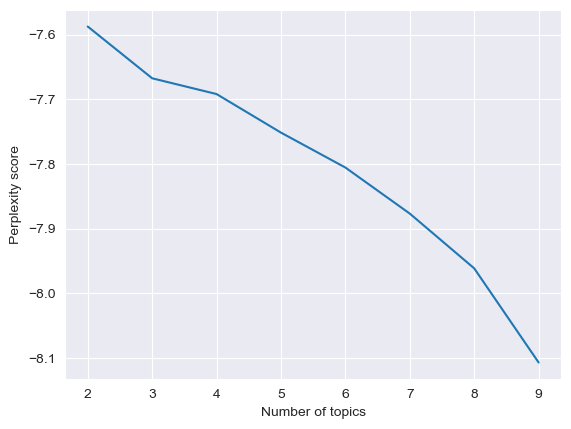

In [50]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

100%|██████████| 8/8 [01:17<00:00,  9.67s/it]


Text(0, 0.5, 'Coherence score')

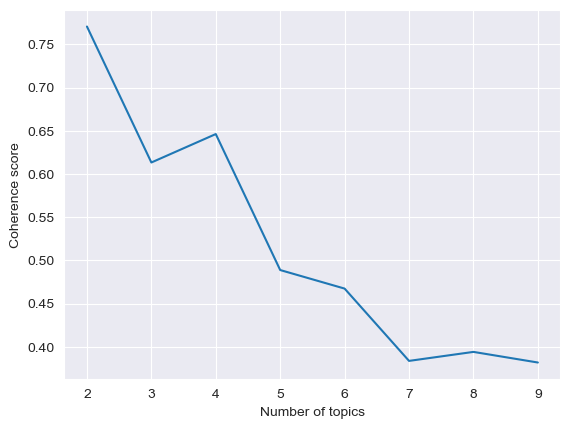

In [51]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [54]:
topic_num = 3
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster1.loc[:, 'action_cluster'] = action_align

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/html/prepared_data_new_cluster1.html')

100%|██████████| 6926/6926 [00:00<00:00, 10693.55it/s]


In [55]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.009*"수비드" + 0.008*"리뷰" + 0.007*"출시" + 0.007*"신혼" + 0.006*"추천" + 0.006*"모델" + 0.006*"키친" + 0.006*"빌트" + 0.005*"구입" + 0.005*"전기"
Topic ID: 1, Description: 0.033*"기능" + 0.022*"설치" + 0.019*"가격" + 0.017*"요리" + 0.017*"주방" + 0.014*"사용" + 0.012*"드리다" + 0.012*"스팀" + 0.011*"조리" + 0.010*"할인"
Topic ID: 2, Description: 0.034*"사용" + 0.017*"기능" + 0.012*"요리" + 0.011*"않다" + 0.010*"없다" + 0.008*"굽다" + 0.007*"사다" + 0.007*"공간" + 0.007*"청소" + 0.006*"넣다"


In [56]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster1.action_cluster):
    if i == 0:
        n = 3
    elif i == 1:
        n = 2
    else:
        n = 1
    new_action_topic.append(n)
df_cluster1.action_cluster = new_action_topic

100%|██████████| 6926/6926 [00:00<00:00, 1028455.34it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_3636\762668794.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.action_cluster = new_action_topic


In [57]:
df_cluster0 = df_cluster0[['Title', 'tagged_review', 'cluster', 'action_cluster']]
df_cluster1 = df_cluster1[['Title', 'tagged_review', 'cluster', 'action_cluster']]
df_combined = pd.concat([df_cluster0, df_cluster1],
                        ignore_index=True)
df_combined.to_csv("data/new_클러스터_분석_태그.csv", index=False)

In [58]:
df_cluster0 = df_cluster0[['Title', 'cluster', 'action_cluster']]
df_cluster1 = df_cluster1[['Title', 'cluster', 'action_cluster']]

df_combined = pd.concat([df_cluster0, df_cluster1],
                        ignore_index=True)
df_combined

,Title,cluster,action_cluster
0,안녕하세요 한경희광파오븐 찾는 분들이 관심을 갖고 글을 클릭하게 되셨을 텐데요 제가...,0,3
1,광파 오븐은 선물을 받아서 너무 유용하게 사용 중입니다 전자레인지 오븐 에어 프라이...,0,2
2,안녕하세요 신혼집을 맞춘 터라 광파 오븐도 진행합니다 친구의 추천으로 광파 오븐이 ...,0,2
3,화제 집중 쿠쿠 멀티 광파 오븐 직접 설치 할인하네요 반갑습니다 여러분의 제품 리뷰...,0,3
4,미디어 광파 오븐 에어 프라이어 상품에 대한 성능과 장점 다양한 정보를 공유해 드리...,0,1
...,...,...,...
9675,광파 오븐 이건 조합원만 주나요 지인이 일반 분양 거로 계약했다는데 물어보네요,1,3
9676,안녕하십니까 새로운 정보를 가지고 오는 전자 구미형 곡점 김경민 팀장입니다 오늘은 ...,1,3
9677,매립된 광파 오븐 사용하고 계시나요 전자레인지 돌리면 원래 안에 없이 돌아가나요 보...,1,1
9678,고민 고민하다 세탁실 선반에 광파 오븐 뒀는데 제가 키가 작아서 불편하기도 하고 혹...,1,1


In [59]:
df_combined.to_csv("data/new_클러스터_분석완료_추가.csv", index=False)

In [60]:
import json

with open('../SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    senti_dict = json.load(f)
senti_dict

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

In [61]:
def sentiment_score(sent_dicts, token_list):
    result_list = []
    for token in token_list:
        for dict in sent_dicts:
            if token == dict['word']:
                result = dict['polarity'], dict['word']
                result_list.append(result)
    return result_list

In [62]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)

    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb', 'VerbPrefix']:
            tagged_list.append(word)
    return tagged_list

In [63]:
sentiment = []
for i in tqdm(df_combined['Title']):
    token = okt_pos_tagging(i)
    score = sentiment_score(senti_dict, token)
    sentiment.append(score)
sentiment

100%|██████████| 9680/9680 [02:51<00:00, 56.35it/s] 


[[],
 [('1', '받다'), ('2', '유용하다'), ('2', '만족스럽다')],
 [('1', '친구'), ('2', '좋다'), ('2', '만족')],
 [('1', '할인'), ('2', '반갑다'), ('2', '좋다')],
 [('2', '장점'), ('1', '다양하다'), ('2', '많다')],
 [('2', '장점')],
 [('1', '받다'), ('2', '예쁘다')],
 [('2', '좋다'), ('2', '좋다'), ('2', '좋다'), ('2', '예쁘다')],
 [('2', '건강하다')],
 [('2', '좋다'), ('2', '뿌듯하다'), ('2', '예쁘다')],
 [],
 [],
 [('2', '많다'), ('1', '저렴하다')],
 [],
 [],
 [('2', '깔끔하다')],
 [('2', '좋다')],
 [],
 [],
 [('1', '할인'), ('1', '받다'), ('1', '할인'), ('2', '좋다')],
 [('1', '빠르다'), ('2', '가능하다'), ('2', '가능하다')],
 [('2', '편하다')],
 [('-2', '아니다')],
 [('2', '만족하다'), ('2', '친절하다')],
 [],
 [('1', '인기'), ('2', '좋다'), ('2', '친절하다'), ('2', '좋다')],
 [],
 [('1', '필수'), ('2', '만족하다'), ('2', '고르다'), ('0', '원하다')],
 [],
 [('2', '깨끗하다'), ('-2', '해')],
 [],
 [],
 [('-1', '없다'), ('1', '혜택'), ('1', '낫다')],
 [('2', '좋다'), ('2', '친절하다')],
 [('-1', '없다'), ('1', '부드럽다'), ('1', '저렴하다'), ('2', '좋다'), ('1', '할인')],
 [],
 [('2', '축하'), ('2', '행복하다')],
 [('2', '반갑다')],
 [],
 [],
 [('2',

In [64]:
 #감성점수 평균구하기
sentiment_score = []
for sent in tqdm(sentiment):
    score = []
    for s in sent:
        score.append(int(s[0]))

    #감성 점수가 잡히지 않은 리스트는 len이 0
    if len(score) == 0:
        sentiment_score.append(0)
    else:
        sentiment_score.append(np.mean(score))
sentiment_score

100%|██████████| 9680/9680 [00:00<00:00, 252775.89it/s]


[0,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 2.0,
 1.5,
 2.0,
 2.0,
 2.0,
 0,
 0,
 1.5,
 0,
 0,
 2.0,
 2.0,
 0,
 0,
 1.25,
 1.6666666666666667,
 2.0,
 -2.0,
 2.0,
 0,
 1.75,
 0,
 1.25,
 0,
 0.0,
 0,
 0,
 0.3333333333333333,
 2.0,
 0.8,
 0,
 2.0,
 2.0,
 0,
 0,
 2.0,
 0.0,
 2.0,
 0.5,
 1.6666666666666667,
 1.5,
 0,
 0,
 0,
 0,
 0,
 0,
 2.0,
 1.0,
 2.0,
 0,
 0,
 1.0,
 1.0,
 1.0,
 1.6666666666666667,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 0,
 0,
 2.0,
 0.5,
 0.0,
 1.0,
 0,
 0,
 1.5,
 2.0,
 0,
 1.0,
 1.25,
 1.75,
 2.0,
 2.0,
 0,
 2.0,
 2.0,
 0.4,
 2.0,
 0,
 1.0,
 1.3333333333333333,
 -1.0,
 1.0,
 0,
 1.6666666666666667,
 -1.0,
 0,
 1.0,
 2.0,
 -0.3333333333333333,
 1.0,
 0,
 0,
 0,
 2.0,
 0,
 2.0,
 0.3333333333333333,
 1.6666666666666667,
 0,
 0,
 1.2,
 0,
 0,
 1.6,
 0,
 1.5,
 0,
 1.0,
 0,
 -1.0,
 0,
 2.0,
 1.0,
 1.3333333333333333,
 1.0,
 1.6666666666666667,
 1.75,
 0,
 -1.0,
 2.0,
 1.0,
 0,
 0,
 2.0,
 0,
 1.8333333333333333,


In [65]:
df_combined['sentiment_score'] = sentiment_score
df_combined.action_cluster.unique()

array([3, 2, 1], dtype=int64)

In [66]:
action_sents = dict()
for actor in df_combined.cluster.unique():
    actor_df = df_combined[df_combined['cluster'] == actor]

    for i in actor_df.action_cluster.unique():
        action_score = actor_df[actor_df['action_cluster'] == i].sentiment_score
        action_score = np.mean(action_score)
        action_sents['Actor{}_Action{}'.format(actor, i)] = action_score
action_sents

{'Actor0_Action3': 0.8540151014109347,
 'Actor0_Action2': 1.2673435442041088,
 'Actor0_Action1': 1.119166033834022,
 'Actor1_Action1': 0.36502823824907465,
 'Actor1_Action3': 0.4031700561821044,
 'Actor1_Action2': 0.7504075342854871}

In [67]:
from sklearn.preprocessing import MinMaxScaler

data = action_sents.values()

data = np.array(list(data)).reshape(-1, 1)
data

array([[0.8540151 ],
       [1.26734354],
       [1.11916603],
       [0.36502824],
       [0.40317006],
       [0.75040753]])

In [68]:
scaler = MinMaxScaler(feature_range=(-10, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[  0.83849204],
       [ 10.        ],
       [  6.71561572],
       [-10.        ],
       [ -9.15457894],
       [ -1.45799049]])

In [69]:
sents_df = pd.DataFrame(action_sents.keys(), columns=['Action'])
sents_df['satisfaction'] = transformed_data
sents_df

,Action,satisfaction
0,Actor0_Action3,0.838492
1,Actor0_Action2,10.000000
2,Actor0_Action1,6.715616
3,Actor1_Action1,-10.000000
4,Actor1_Action3,-9.154579
5,Actor1_Action2,-1.457990


In [70]:
from collections import Counter

importance_check = []
for actor, action in zip(df_combined['cluster'], df_combined['action_cluster']):
    importance_check.append('Actor' + str(actor) + '_' + 'Action' + str(action))
importance_check

['Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Act

In [71]:
freq = Counter(importance_check)
freq

Counter({'Actor1_Action1': 2726,
         'Actor1_Action2': 2540,
         'Actor1_Action3': 1660,
         'Actor0_Action2': 1169,
         'Actor0_Action1': 1009,
         'Actor0_Action3': 576})

In [72]:
importance_dict = dict()

total_count = len(importance_check)
for item, value in freq.items():
    importance = (value / total_count) * 100
    importance_dict[item] = importance
importance_dict

{'Actor0_Action3': 5.950413223140496,
 'Actor0_Action2': 12.076446280991735,
 'Actor0_Action1': 10.423553719008265,
 'Actor1_Action1': 28.161157024793386,
 'Actor1_Action3': 17.148760330578515,
 'Actor1_Action2': 26.239669421487605}

In [73]:
data = importance_dict.values()

data = np.array(list(data)).reshape(-1, 1)
data

array([[ 5.95041322],
       [12.07644628],
       [10.42355372],
       [28.16115702],
       [17.14876033],
       [26.23966942]])

In [74]:
scaler = MinMaxScaler(feature_range=(0, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 0.        ],
       [ 2.75813953],
       [ 2.01395349],
       [10.        ],
       [ 5.04186047],
       [ 9.13488372]])

In [75]:
sents_df['importance'] = transformed_data
sents_df

,Action,satisfaction,importance
0,Actor0_Action3,0.838492,0.000000
1,Actor0_Action2,10.000000,2.758140
2,Actor0_Action1,6.715616,2.013953
3,Actor1_Action1,-10.000000,10.000000
4,Actor1_Action3,-9.154579,5.041860
5,Actor1_Action2,-1.457990,9.134884


In [76]:
def Opportunity_score(satisfaction, importance):
    return importance + max(0, satisfaction - importance)

In [77]:
opportunity_list = []
for s, i in zip(sents_df['satisfaction'], sents_df['importance']):
    score_result = Opportunity_score(s, i)
    opportunity_list.append(score_result)
sents_df['opportunity'] = opportunity_list
sents_df.to_csv('data/new_opportunity_score_df.csv', index=False)
sents_df

,Action,satisfaction,importance,opportunity
0,Actor0_Action3,0.838492,0.000000,0.838492
1,Actor0_Action2,10.000000,2.758140,10.000000
2,Actor0_Action1,6.715616,2.013953,6.715616
3,Actor1_Action1,-10.000000,10.000000,10.000000
4,Actor1_Action3,-9.154579,5.041860,5.041860
5,Actor1_Action2,-1.457990,9.134884,9.134884


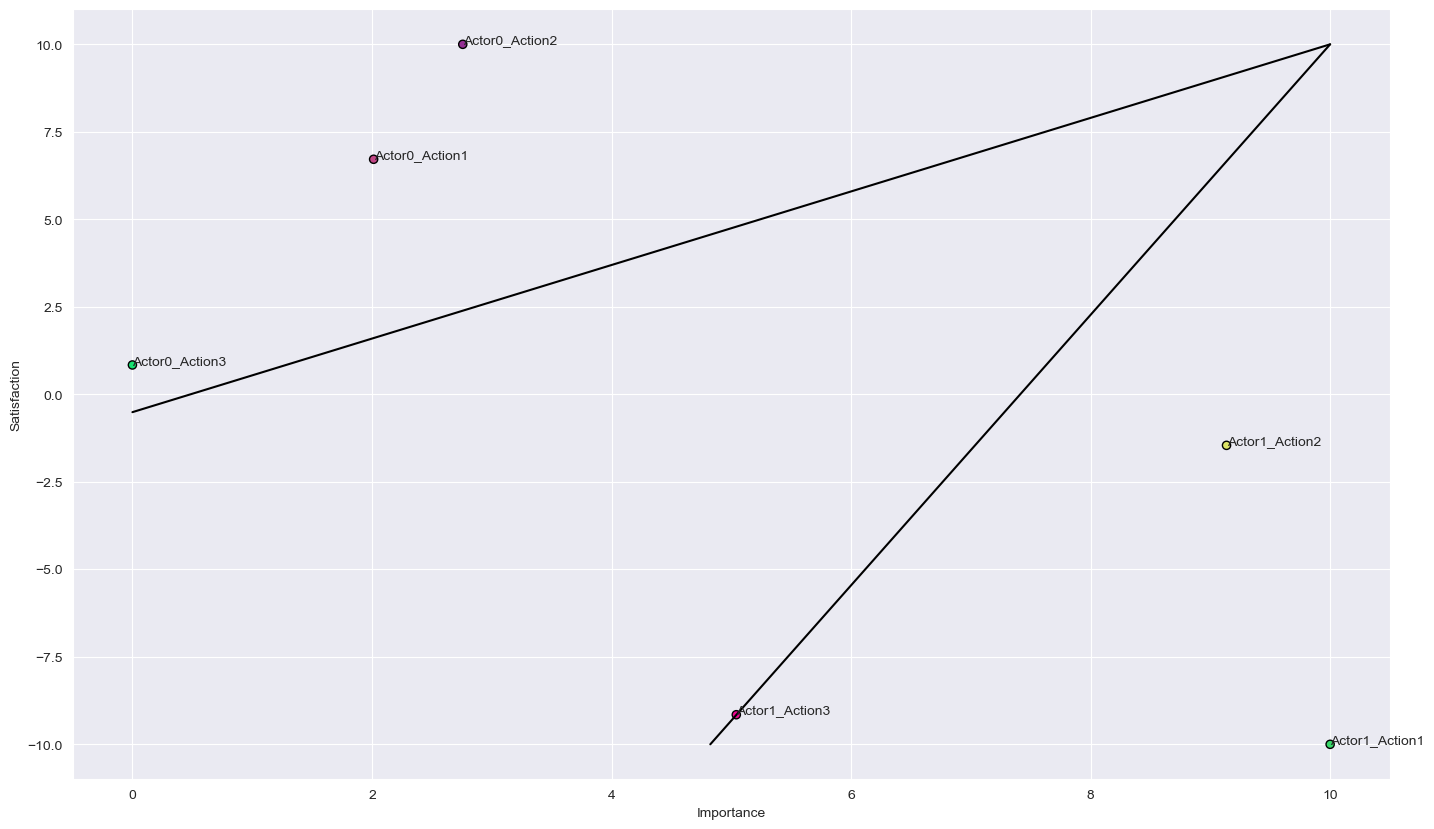

In [78]:
colors = np.random.rand(len(sents_df.Action), 3)
satisfaction = sents_df.satisfaction
importance = sents_df.importance
actions = sents_df.Action
plt.figure(figsize=(17, 10))
plt.scatter(importance, satisfaction, s=35, c=colors, edgecolors='black')  #s는 점의 사이

xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k')

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

x_data = [importance.mean(), 10]
y_data = [-10, 10]
plt.plot(x_data, y_data, 'k')

for i, action in enumerate(actions):
    plt.text(importance[i], satisfaction[i], action, fontsize=10)

plt.savefig('data/opportunity_area.png')